# This notebook plots the figure 2e and 2f for "Closed-Loop Neuromodulation for Treatment Resistant Depression. (NMED-BC111983)" paper. 

# fig 2e: Reproducibility of clinical effects
# fig 2f:  Left: Effect of burst duration on clinical measures.
# fig 2f: Right: Effect of increasing dose (1 to 2mA) and changing contacts (3+/4- to 2+/3-) on clinical measures

In [1]:
import numpy as np
import pandas as pd
import scipy 
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [3]:

SRC_DATA_DIR = './source_data'
Effect_of_burst_duration_on_clinical_measures = 'Effect_of_burst_duration_on_clinical_measures.csv'
df  = pd.read_csv(os.path.join(SRC_DATA_DIR, Effect_of_burst_duration_on_clinical_measures))
df

,Unnamed: 0,HAMD,VAS_D
0,"rvc3-4 (1mA,6*6sec)",-4,-9
1,"rvc3-4 (1mA,3*12sec)",-2,0
2,"rvc3-4 (1mA,2*18sec)",-1,-12
3,"rvc3-4 (1mA, 1*36sec)",-1,-7
4,"rvc3-4 (1mA, 1*54sec)",-2,-8
5,"rvc3-4 (2mA,1*54sec)",4,12
6,"rvc2-3 (1mA,6*6sec)",-2,-7


In [4]:
hamd = df['HAMD']
vas = df['VAS_D']

<Figure size 864x288 with 0 Axes>

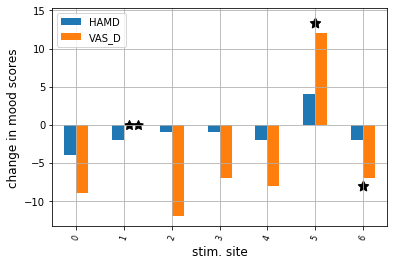

In [6]:
plt.figure(figsize=(12, 4))
df.plot.bar()
plt.xticks(rotation = 70, fontsize =8)  
plt.ylabel('change in mood scores', fontsize =12)
plt.xlabel('stim. site', fontsize =12)
plt.grid()

plt.scatter(5,13.3, color = 'black' ,marker= (5,1) ,s= 120)
plt.scatter(6,-8, color = 'black' , marker= (5,1), s= 120)
plt.scatter(1.1,0, color = 'black' , marker= (5,1), s= 100)
plt.scatter(1.3,0, color = 'black' , marker= (5,1), s= 100)

plt.show()


In [7]:

Reproducibility_of_clinical_effects_amygala = 'Reproducibility_of_clinical_effects_amygala.csv'
df2 = pd.read_csv(os.path.join(SRC_DATA_DIR, Reproducibility_of_clinical_effects_amygala))
amyg_hamd = df2['amyg_hamd'] 
amyg_VAS_D = df2['amyg_VAS_D']


In [8]:

rvc1_2_hamd = np.array([-1,1])
rvc1_2_VAS_D = np.array([11,-13])



In [16]:
Reproducibility_of_clinical_effects_rvc2_3 = 'Reproducibility_of_clinical_effects_rvc2_3.csv'
df3 = pd.read_csv(os.path.join(SRC_DATA_DIR, Reproducibility_of_clinical_effects_rvc2_3))
rvc2_3_hamd = df3['rvc2_3_hamd'].dropna() 
rvc2_3_VAS_D = df3['rvc2_3_VAS_D']  




In [29]:
Reproducibility_of_clinical_effects_rvc3_4 = 'Reproducibility_of_clinical_effects_rvc3_4.csv'
df4 = pd.read_csv(os.path.join(SRC_DATA_DIR, Reproducibility_of_clinical_effects_rvc3_4))
rvc3_4_hamd = df4['rvc3_4_hamd'].dropna()
rvc3_4_VAS_D = df4['rvc3_4_VAS_D'] 



In [31]:
amyg_hamd_avg = np.mean(amyg_hamd)
amyg_VAS_D_avg = np.mean(amyg_VAS_D)



rvc1_2_hamd_avg = np.mean(rvc1_2_hamd)
rvc1_2_VAS_D_avg = np.mean(rvc1_2_VAS_D)


rvc2_3_hamd_avg = np.mean(rvc2_3_hamd)
rvc2_3_VAS_D_avg = np.mean(rvc2_3_VAS_D)


rvc3_4_hamd_avg = np.mean(rvc3_4_hamd)
rvc3_4_VAS_D_avg = np.mean(rvc3_4_VAS_D)



<Figure size 864x864 with 0 Axes>

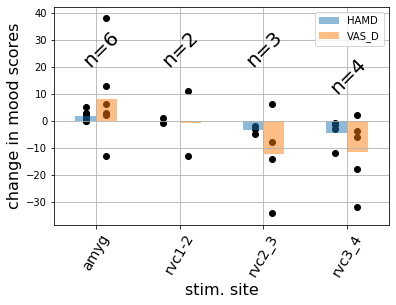

In [32]:

y1 = [amyg_hamd_avg, rvc1_2_hamd_avg,rvc2_3_hamd_avg,rvc3_4_hamd_avg]
y2 = [amyg_VAS_D_avg,rvc1_2_VAS_D_avg, rvc2_3_VAS_D_avg, rvc3_4_VAS_D_avg]

df = pd.DataFrame(y1, index =['amyg','rvc1-2','rvc2_3','rvc3_4'], columns = ['HAMD'])
df['VAS_D'] = y2




plt.figure(figsize=(12,12))
df.plot.bar(alpha = 0.5)
plt.xticks(rotation =60, fontsize =8)  
plt.ylabel('change in mood scores', fontsize =16)
plt.xlabel('stim. site', fontsize =16)
plt.scatter([-.125,-.125,-.125,-.125,-.125,-.125],amyg_hamd, color = 'black')
plt.scatter([0.12,0.12,0.12,0.12,0.12,0.12],amyg_VAS_D, color = 'black')
plt.xticks(fontsize= 14)

plt.scatter([0.8,0.8],rvc1_2_hamd, color = 'black')
plt.scatter([1.1,1.1],rvc1_2_VAS_D, color = 'black')


plt.scatter([1.9,1.9,1.9],rvc2_3_hamd, color = 'black')
plt.scatter([2.1,2.1,2.1,2.1],rvc2_3_VAS_D, color = 'black')


plt.scatter([2.85,2.85,2.85,2.85],rvc3_4_hamd, color = 'black')
plt.scatter([3.12,3.12,3.12,3.12,3.12],rvc3_4_VAS_D, color = 'black')
plt.grid()


plt.annotate('n='+ str(len(amyg_hamd)), xy =(-.2, 20), xytext =(-.2, 20), fontsize =20, rotation= 45)






plt.annotate('n='+ str(len(rvc1_2_hamd)), xy =(.75, 20), xytext =(.75, 20), fontsize =20, rotation= 45)




plt.annotate('n='+ str(len(rvc2_3_hamd)), xy =(1.75, 20), xytext =(1.75, 20), fontsize =20, rotation= 45)




plt.annotate('n='+ str(len(rvc3_4_hamd)), xy =(2.75, 10), xytext =(2.75, 10), fontsize =20, rotation= 45)



plt.show()




In [33]:
import scipy.stats as stats


fvalue1, pvalue1 = stats.f_oneway(amyg_VAS_D, rvc1_2_VAS_D)
print(fvalue1, pvalue1)


fvalue2, pvalue2 = stats.f_oneway(amyg_VAS_D, rvc2_3_VAS_D)
print(fvalue2, pvalue2)


fvalue3, pvalue3 = stats.f_oneway(amyg_VAS_D, rvc3_4_VAS_D)
print(fvalue3, pvalue3)




fvalue4, pvalue4 = stats.f_oneway(amyg_hamd, rvc1_2_hamd)
print(fvalue4, pvalue4)


fvalue5, pvalue5 = stats.f_oneway(amyg_hamd, rvc2_3_hamd)
print(fvalue5, pvalue5)


fvalue6, pvalue6 = stats.f_oneway(amyg_hamd, rvc3_4_hamd)
print(fvalue6, pvalue6)





0.43997866770095995 0.5317754713090624
3.6320366132723123 0.09313342449609023
4.4358369155859165 0.06447227384541428
1.4520000000000002 0.27357328009706583
15.903073286052015 0.005270757241601996
7.511440050750687 0.025421683831169214
